### Problem Statement
Một công ty startup muốn tung ra thị trường sản phẩm ô tô, do đó họ cẩn biết yếu tố nào tác động mạnh mẽ đến giá xe để từ đó xây dựng các chiến lược sản xuất phù hợp và đặc biệt là cạnh tranh với các thương hiệu hiện có trên thị trường

### Goal
Chúng ta sẽ xây dựng mô hình dự báo giá xe bằng mô hình Linear Regression và Polynomial Regression và chọn ra mô mình dự báo giá có tỉ lệ chính xác cao. Việc sử dụng mô hình này giúp ban quản lý hiểu chính xác giá xe sẽ thay đổi như thế nào với các biến độc lập. Từ đây họ có tập trung vào các biến này để xây dựng chiến lược kinh doanh đáp ứng các mức giá nhất định

In [31]:
# import thư viện
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
header =('symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price')


In [33]:
df = pd.read_csv('D:\KimTuyen\Documents\Data analysis\Mid_term\imports-85.data',names = header)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [34]:
# replace "?" values = NaN values
df.replace("?", np.nan, inplace=True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [35]:
null = df.isnull()
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [36]:
df.columns[df.isnull().any()]

Index(['normalized-losses', 'num-of-doors', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [37]:
for i in null.columns.values.tolist():
    print(i)
    print(null[i].value_counts())
    print('----------------------')

symboling
False    205
Name: symboling, dtype: int64
----------------------
normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64
----------------------
make
False    205
Name: make, dtype: int64
----------------------
fuel-type
False    205
Name: fuel-type, dtype: int64
----------------------
aspiration
False    205
Name: aspiration, dtype: int64
----------------------
num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64
----------------------
body-style
False    205
Name: body-style, dtype: int64
----------------------
drive-wheels
False    205
Name: drive-wheels, dtype: int64
----------------------
engine-location
False    205
Name: engine-location, dtype: int64
----------------------
wheel-base
False    205
Name: wheel-base, dtype: int64
----------------------
length
False    205
Name: length, dtype: int64
----------------------
width
False    205
Name: width, dtype: int64
----------------------
height
False    205
Name: height, dtype:

In [38]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [39]:
# Check Mean of Variables that have NaN values, in ra số thập phân có 3 chữ số
print('Average of normalize-losses:',"%.3f"%  df['normalized-losses'].astype('float').mean(axis=0))
print('Average of horsepower :',"%.3f"%  df['horsepower'].astype('float').mean(axis=0))
print('Average of bore:', "%.3f"%  df['bore'].astype('float').mean(axis=0))
print('Average of stroke:', "%.3f"%  df['stroke'].astype('float').mean(axis=0))
print('Average of peak-rpm:', "%.3f"%  df['peak-rpm'].astype('float').mean(axis=0))

Average of normalize-losses: 122.000
Average of horsepower : 104.256
Average of bore: 3.330
Average of stroke: 3.255
Average of peak-rpm: 5125.369


In [40]:
# Replace NaN with Mean
df['normalized-losses'].replace(np.nan,"%.3f"% df['normalized-losses'].astype('float').mean(axis=0),inplace = True)
df['horsepower'].replace(np.nan,"%.3f"%  df['horsepower'].astype('float').mean(axis=0),inplace= True)
df['bore'].replace(np.nan,"%.3f"%  df['bore'].astype('float').mean(axis=0),inplace = True)
df['stroke'].replace(np.nan,"%.3f"%  df['stroke'].astype('float').mean(axis=0),inplace = True)
df['peak-rpm'].replace(np.nan,"%.3f"%  df['peak-rpm'].astype('float').mean(axis=0),inplace = True)

In [41]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [42]:
# Replace NaN với giá trị lớn nhất hiện có
df['num-of-doors'].replace(np.nan,'four',inplace = True)


In [43]:
#Drop NaN Price values
df.dropna(subset=['price'], axis=0, inplace = True)

In [44]:
df.reset_index(drop=True,inplace = True)
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.000,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.000,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [45]:
df['num-of-doors'].unique()

array(['two', 'four'], dtype=object)

In [46]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [47]:
# Convert numerical variables to numerical data types
df[['normalized-losses','bore','stroke','price','peak-rpm','horsepower']] = df[['normalized-losses','bore','stroke','price','peak-rpm','horsepower']].astype("float")

In [48]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [49]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330697,3.256866,10.164279,103.405532,5117.665363,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365699,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [50]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.00000,201,201,201,201,201,201,201,201.000000,...,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,181,165,115,94,118,198,NaN,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.797015,...,126.875622,NaN,3.330697,3.256866,10.164279,103.405532,5117.665363,25.179104,30.686567,13207.129353
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.066366,...,41.546834,NaN,0.268072,0.316048,4.004965,37.365699,478.113805,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5125.369000,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


In [51]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [52]:
### Scaling data
df['city-Litre/100km'] = 235/df['city-mpg']
df['highway-mpg/100km'] = 235/df['highway-mpg']

In [53]:
df['length_nomalized'] = df['length']/df['length'].max()
df['width_nomalized'] = df['width']/df['width'].max()
df['height_nomalized'] = df['height']/df['height'].max()

In [54]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litre/100km,highway-mpg/100km,length_nomalized,width_nomalized,height_nomalized
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,13495.0,11.190476,8.703704,0.811148,0.890278,0.816054
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,111.0,5000.0,21,27,16500.0,11.190476,8.703704,0.811148,0.890278,0.816054
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,154.0,5000.0,19,26,16500.0,12.368421,9.038462,0.822681,0.909722,0.876254
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,102.0,5500.0,24,30,13950.0,9.791667,7.833333,0.848630,0.919444,0.908027
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,115.0,5500.0,18,22,17450.0,13.055556,10.681818,0.848630,0.922222,0.908027


### 2. Data Visualization

In [55]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-Litre/100km,highway-mpg/100km,length_nomalized,width_nomalized,height_nomalized
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.008199,...,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.365404,-0.242423,-0.550160
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055022,...,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,0.019424,0.086802,-0.373737
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.158033,...,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.876024,0.814507,0.590742
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123964,...,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,1.000000,0.857170,0.492063
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188824,...,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.857170,1.000000,0.306002
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.060617,...,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.492063,0.306002,1.000000
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167445,...,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.880665,0.866201,0.307581
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205963,...,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.685025,0.729436,0.074694
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,...,0.566939,-0.267357,-0.582051,-0.591330,0.543155,0.554640,0.559134,0.608963,0.544884,0.180417
stroke,-0.008199,0.055022,0.158033,0.123964,0.188824,-0.060617,0.167445,0.205963,-0.055390,1.000000,...,0.098263,-0.063611,-0.033921,-0.034606,0.082270,0.036090,0.047057,0.123964,0.188824,-0.060617


In [56]:
for i in df.columns.values.tolist():
    print(df[[i,'price']].corr())
    print('')

           symboling     price
symboling   1.000000 -0.082391
price      -0.082391  1.000000

                   normalized-losses     price
normalized-losses           1.000000  0.133999
price                       0.133999  1.000000

       price
price    1.0

       price
price    1.0

       price
price    1.0

       price
price    1.0

       price
price    1.0

       price
price    1.0

       price
price    1.0

            wheel-base     price
wheel-base    1.000000  0.584642
price         0.584642  1.000000

          length     price
length  1.000000  0.690628
price   0.690628  1.000000

          width     price
width  1.000000  0.751265
price  0.751265  1.000000

          height     price
height  1.000000  0.135486
price   0.135486  1.000000

             curb-weight     price
curb-weight     1.000000  0.834415
price           0.834415  1.000000

       price
price    1.0

       price
price    1.0

             engine-size     price
engine-size     1.000000  0.872335
pr

#### kiểm tra mqh giữa independent và dependent variable

In [57]:
df[['length','price']].corr()

,length,price
length,1.000000,0.690628
price,0.690628,1.000000


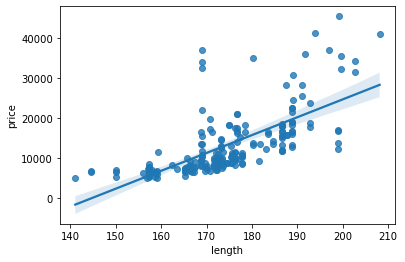

In [58]:
# check correlation between length and price
sns.regplot(x='length',y='price',data=df);

In [59]:
df[['curb-weight','price']].corr()

,curb-weight,price
curb-weight,1.000000,0.834415
price,0.834415,1.000000


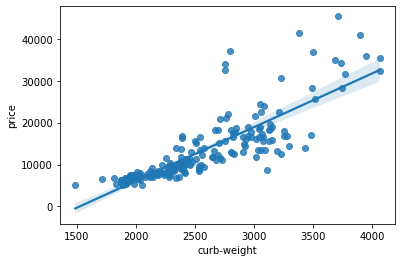

In [60]:
#check correlation between curb-weight and price
sns.regplot(x='curb-weight', y ='price', data=df);

In [61]:
df[['width','price']].corr()

,width,price
width,1.000000,0.751265
price,0.751265,1.000000


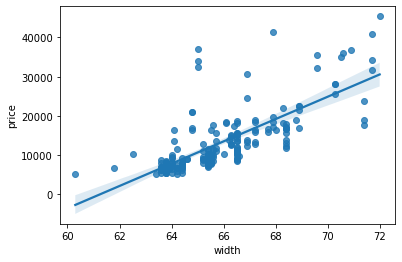

In [62]:
#check correlation between width and price
sns.regplot(x='width',y='price',data=df);

In [63]:
df[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


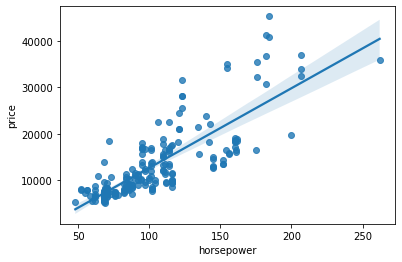

In [64]:
# check correlation between horsepower and price
sns.regplot(x='horsepower',y='price',data=df);

In [65]:
df[['city-Litre/100km','price']].corr()

,city-Litre/100km,price
city-Litre/100km,1.000000,0.789898
price,0.789898,1.000000


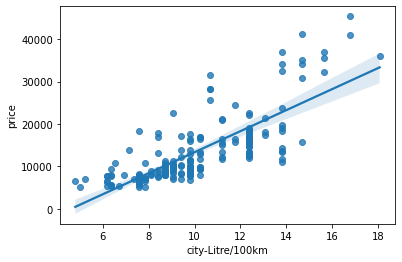

In [66]:
# check correlation between city-Litre/100km and price
sns.regplot(x='city-Litre/100km',y ='price',data=df);

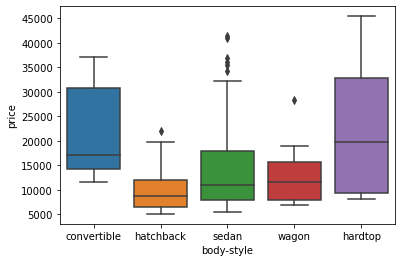

In [67]:
#prices of car group
sns.boxplot(x='body-style',y='price',data=df);

<AxesSubplot:xlabel='engine-location', ylabel='price'>

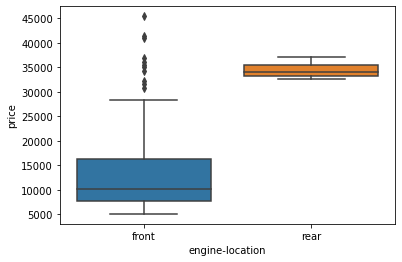

In [68]:
#prices of engine location
sns.boxplot(x='engine-location', y='price',data = df)

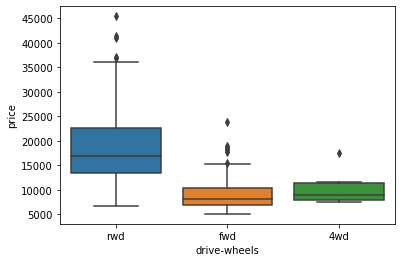

In [69]:
sns.boxplot(x='drive-wheels',y='price',data =df);

### Pre-pocessing: Feature selection/extraction

Text(0.5, 1.0, 'Horsepower bins')

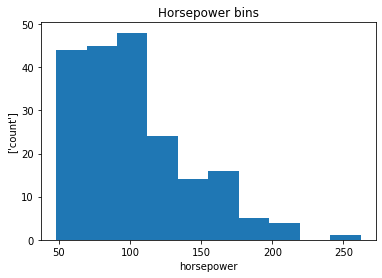

In [70]:
plt.hist(df['horsepower'])
plt.xlabel('horsepower')
plt.ylabel(['count'])
plt.title('Horsepower bins')

In [71]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [72]:
bins_names =['Low','Medium','High']

In [73]:
df['horsepower-binned']= pd.cut(df['horsepower'],bins,labels=bins_names,include_lowest = True)
df[['horsepower','horsepower-binned']]

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
...,...,...
196,114.0,Low
197,160.0,Medium
198,134.0,Medium
199,106.0,Low


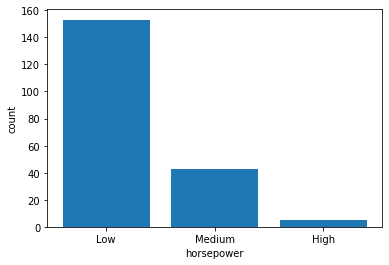

In [74]:
plt.bar(bins_names,df['horsepower-binned'].value_counts())
plt.xlabel('horsepower')
plt.ylabel('count');

### Labelling categories with dummy variable

In [75]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-Litre/100km', 'highway-mpg/100km',
       'length_nomalized', 'width_nomalized', 'height_nomalized',
       'horsepower-binned'],
      dtype='object')

In [76]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [77]:
df = pd.concat([df,dummy_variable_1],axis=1)

In [78]:
dummy_variable_2= pd.get_dummies(df['aspiration'])
dummy_variable_2

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
196,1,0
197,0,1
198,1,0
199,0,1


In [79]:
df = pd.concat([df,dummy_variable_2],axis =1)

In [80]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,city-Litre/100km,highway-mpg/100km,length_nomalized,width_nomalized,height_nomalized,horsepower-binned,diesel,gas,std,turbo
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,11.190476,8.703704,0.811148,0.890278,0.816054,Low,0,1,1,0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,11.190476,8.703704,0.811148,0.890278,0.816054,Low,0,1,1,0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,12.368421,9.038462,0.822681,0.909722,0.876254,Medium,0,1,1,0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,9.791667,7.833333,0.848630,0.919444,0.908027,Low,0,1,1,0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,13.055556,10.681818,0.848630,0.922222,0.908027,Low,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,10.217391,8.392857,0.907256,0.956944,0.928094,Low,0,1,1,0
197,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,12.368421,9.400000,0.907256,0.955556,0.928094,Medium,0,1,0,1
198,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,13.055556,10.217391,0.907256,0.956944,0.928094,Medium,0,1,1,0
199,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,9.038462,8.703704,0.907256,0.956944,0.928094,Low,1,0,0,1


### Peform P-Value test để kiểm tra xem chúng có tác động đến giá cả hay không

In [81]:
# p-value is < 0.001 : correlation is very significant
# p-value is < 0.05  : correlation is significant
# p-value is < 0.1 : the correlation is weakly significant
# p-value is > 0.1 : no evidence that the correlation is significant

In [82]:
import scipy.stats as stats


In [83]:
#Horsepower vs Price
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print("Correlation Coefficient is ", pearson_coef,"and while P-value is ",p_value)

Correlation Coefficient is  0.809574586956172 and while P-value is  6.368997860938694e-48


##### horepower is real causation

In [84]:
# size vs Price
pearson_coef , p_value = stats.pearsonr(df['engine-size'],df['price'])
print("Correlation Coefficient is ", pearson_coef, " and while P-value is", p_value)

Correlation Coefficient is  0.8723351674455185  and while P-value is 9.265491622198389e-64


#### Engine-size is real causation

In [85]:
# lengh vs price
pearson_coef , p_value = stats.pearsonr(df['length'],df['price'])
print("Correlation Coefficient is ", pearson_coef,"and P-value is ", p_value)

Correlation Coefficient is  0.6906283804483642 and P-value is  8.016477466158759e-30


#### Length is real causation

In [86]:
# width vs Price
pearson_coef , p_value = stats.pearsonr(df['width'],df['price'])
print('Correlation Coefficient is', pearson_coef, 'and P-value is ', p_value)

Correlation Coefficient is 0.7512653440522672 and P-value is  9.20033551048217e-38


#### width is real causation

In [87]:
#Curb weight vs Price 
pearson_coef , p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('Corelation Coefficient is', pearson_coef, 'and P-Value is',p_value)

Corelation Coefficient is 0.8344145257702846 and P-Value is 2.1895772388936914e-53


#### width is real causation

In [88]:
# City-Litres/100km vs Price
pearson_coef , p_value = stats.pearsonr(df['city-Litre/100km'],df['price'])
print('Corelation Coefficient is', pearson_coef, 'and P-Value is',p_value)

Corelation Coefficient is 0.7898975136626942 and P-Value is 3.903106400939858e-44


#### City-Litres is real causation

In [89]:
# Highway-litres/100km vs Price
pearson_coef , p_value = stats.pearsonr(df['highway-mpg/100km'],df['price'])
print('Corelation Coefficient is', pearson_coef, 'and P-Value is',p_value)

Corelation Coefficient is 0.8011176263981975 and P-Value is 3.046784581041283e-46


 #### Highway-litres/100km is real causation

### Các biến phù hợp cho predict model:
##### horepower 
##### Length
##### Engine-size
##### Curb weight
##### Highway-litres
##### width
##### City-Litres

In [90]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-Litre/100km', 'highway-mpg/100km',
       'length_nomalized', 'width_nomalized', 'height_nomalized',
       'horsepower-binned', 'diesel', 'gas', 'std', 'turbo'],
      dtype='object')

### 4. Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [92]:
x1 = df[['horsepower','curb-weight','engine-size','highway-mpg/100km','city-Litre/100km','length','width']]
y1 = df['price']

In [93]:
x1_train,x1_test,y1_train,y1_test =train_test_split(x1,y1,random_state=42)

In [94]:
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)

LinearRegression()

In [95]:
yhat1 = lm1.predict(x1_test)

In [96]:
yhat1[0:5]

array([ 6859.07125078, 25120.71771903,  6097.07569507,  8067.80430938,
       13765.70420936])

In [97]:
intercept =lm1.intercept_

In [98]:
slopes = lm1.coef_

In [99]:
intercept,slopes

(-46328.8417045379,
 array([ -6.79706517,   0.76106981,  86.83235411, 109.77306954,
        727.48420372,   9.79434796, 562.74819563]))

In [100]:
# đánh giá mô hình
print('The full R-square is : ', lm1.score(x1,y1))
print('The train R-square is : ', lm1.score(x1_train,y1_train))
print('The test R-square is : ', lm1.score(x1_test,y1_test))

The full R-square is :  0.8054723434346781
The train R-square is :  0.8302428129429251
The test R-square is :  0.7665230745970728


In [101]:
# Tính MSE và MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse =  mean_squared_error(y1_test,yhat1)
mae = mean_absolute_error(y1_test,yhat1)
print(' MSE of price and predicted value is : ', mse)
print ('MSA of price and predicted value is : ',mae)

 MSE of price and predicted value is :  25195257.801463347
MSA of price and predicted value is :  3365.1951391652306


In [102]:
from scipy.stats.stats import pearsonr

In [103]:
pearsonr(lm1.predict(x1_test),y1_test)

(0.9134311711574046, 9.163215234481145e-21)

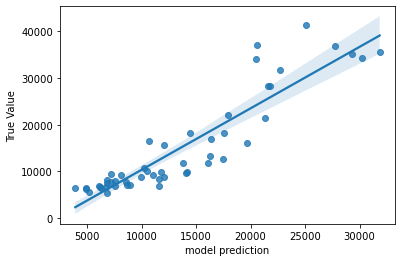

In [104]:
x, y = pd.Series(yhat1, name="model prediction"), pd.Series(y1_test,name="True Value")
sns.regplot(x=x,y=y,data=df);


In [105]:
# Polynomial model

In [106]:
from sklearn.preprocessing import PolynomialFeatures

In [107]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(x1)

In [108]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X_poly,y1,random_state=42)

In [109]:
lm1 = LinearRegression()
lm1.fit(x1_train,y1_train)

LinearRegression()

In [110]:
yhat1 = lm1.predict(x1_test)

In [111]:
yhat1[0:5]

array([ 6600.27375793, 27386.32441711,  6219.20152283,  7871.91068268,
       14290.55850983])

In [112]:
print('the full R-square is :',lm1.score(X_poly,y1))
print ('the train R-square is :',lm1.score(x1_train,y1_train))
print('the test R-square is :',lm1.score(x1_test,y1_test))

the full R-square is : 0.8972125396509276
the train R-square is : 0.9104698119293444
the test R-square is : 0.8764203109101634


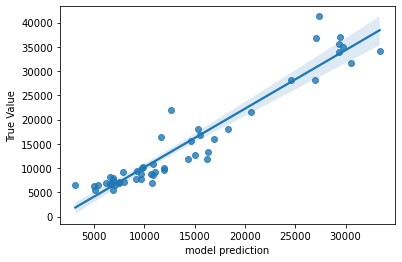

In [113]:
x, y = pd.Series(yhat1, name="model prediction"), pd.Series(y1_test,name="True Value")
sns.regplot(x=x,y=y,data=df);


In [114]:
i =3
while i <=10:
    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(x1)
    x1_train, x1_test,y1_train,y1_test = train_test_split(X_poly,y1,random_state=42)
    lm1 = LinearRegression()
    lm1.fit(x1_train,y1_train)
    yhat1 = lm1.predict(x1_test)
    print(' at i =',i)
    print ('the full R-square is :', lm1.score(X_poly,y1))
    print ('the train R-square is :', lm1.score(x1_train,y1_train))
    print('the test R-square is :', lm1.score(x1_test,y1_test))
    i +=1
    

 at i = 3
the full R-square is : -11.675851053375487
the train R-square is : 0.9788683311323041
the test R-square is : -28.065635474911552
 at i = 4
the full R-square is : -55411.397635201094
the train R-square is : 0.9989856546804844
the test R-square is : -127175.12654270286
 at i = 5
the full R-square is : -93463.46937156163
the train R-square is : 0.9989858609317994
the test R-square is : -214507.84169887225
 at i = 6
the full R-square is : -268410.3750291647
the train R-square is : 0.9989852778359514
the test R-square is : -616025.7507638908
 at i = 7
the full R-square is : -892041.0326833668
the train R-square is : 0.9989857318517058
the test R-square is : -2047310.7269084891
 at i = 8
the full R-square is : -3123403.5435596406
the train R-square is : 0.9989854886650252
the test R-square is : -7168475.95339247
 at i = 9
the full R-square is : -10934602.212261446
the train R-square is : 0.9989848475703815
the test R-square is : -25095835.942905024
 at i = 10
the full R-square is :

### Giá trị i = 2 là tốt nhất